In [214]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install ipywidgets

^C
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.10/3.10.9/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/Cellar/python@3.10/3.10.9/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/site-packages/pip/__main__.py", line 29, in <module>
    from pip._internal.cli.main import main as _main
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env 

In [ ]:

# from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients
import math
import copy
import numpy
import matplotlib.pyplot as plot
from ipywidgets import interact, interactive, fixed, interact_manual

plot.style.use('./utils_plot/deeplearning.mplstyle')

In [ ]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression. 

    ndarray: N-dimensional array: https://numpy.org/doc/stable/reference/arrays.ndarray.html

    Args: 
        x (ndarray (m,)):       data, m examples
        y (ndarray, (m,)):      target values
        w, b (scalar):          model parameters
    
    Returns 
        total_cost (float):     the cost of using w, b as the parameters for linear regression 
                                to fit the data points in x and y 
    """
    # number of the training examples
    m = x.shape[0]
    cost_sum = 0
    for i in range(m): 
        # given a training example, and parameters w, b, calculate prediction 
        # (prediction is the value of the function f_wb)
        f_wb = w * x[i] + b  # 𝑓𝑤,𝑏(𝑥(𝑖))=𝑤𝑥(𝑖)+𝑏

        # the difference b/w the prediction of the tested model (f_wb), 
        # and the actual value for the given example (y[i])
        diff = f_wb - y[i]  # 𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖)

        # loss is the cost for the given training example
        # because diff can be a negative number, it needs to be squared, 
        # and because it's squared, the loss increases rapidly when w is too small or too large
        loss = diff ** 2  # (𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))2

        # update the cost sum with the value of loss
        cost_sum = cost_sum + loss  # ∑𝑖=0𝑚−1(𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))2

    # calculate the total cost for the given model parameters - J(w, b)
    total_cost = (1 / 2 * m) * cost_sum  # 𝐽(𝑤,𝑏)=12𝑚∑𝑖=0𝑚−1(𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))2
    
    return total_cost



How to automate the process of finding the optimal w and b parameters?

In [ ]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    
    Args: 
        x (ndarray (m,)):       data, m examples
        y (ndarray, (m,)):      target values
        w, b (scalar):          model parameters
    Returns: 
        dj_dw (scalar):         the gradient of the cost w.r.t the parameters w
        dj_db (scalar):         the gradient of the cost w.r.t. the parameters b
    """
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m): 
        f_wb = w * x[i] + b

        dj_dw_i = (f_wb - y[i]) * x[i]  # (𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))𝑥(𝑖)
        dj_db_i = f_wb - y[i]  # (𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))

        # update both variables simultaneously
        dj_dw += dj_db_i  
        dj_db += dj_dw_i 

    dj_dw = dj_dw / m  # 1/𝑚∑𝑖=0𝑚−1(𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))𝑥(𝑖)
    dj_db = dj_db / m  # 1/𝑚∑𝑖=0𝑚−1(𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))

    return dj_dw, dj_db


In [ ]:
def gradient_descent(x, y, w_initial, b_initial, alpha, number_of_iterations, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w, b. 
    Updates w, b by taking number_of_iterations gradient steps with learning rate alpha

    Args: 
        x (ndarray (m,)):               data, m examples
        y (ndarray, (m,)):              target values
        w_initial, b_initial (scalar):  model parameters
        alpha (float):                  learning rate
        number_of_iterations (int):     number of iterations to run gradient descent
        cost_function:                  callback to produce cost
        gradient_function:              callback to produce gradient

    Returns: 
        w, b (scalar):                  updated values of parameters w, b after running gradient descent
        J_history (list):               history of cost values
        p_history (list):               history of parameters [w, b]
    """

    w = w_initial
    b = b_initial

    for i in range(number_of_iterations): 
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw  # w = 𝑤−𝛼∂𝐽(𝑤,𝑏)∂𝑤
        b = b - alpha * dj_db  # b = 𝑏−𝛼∂𝐽(𝑤,𝑏)∂𝑏
    
    return w, b


Because the original data stored as json has much more features than we're going to need at the moment,
we need to reduce it: 
- from the list of features of each home, leave price, area and id
- filter out those homes, that have no price or no area
- parse the values to get integers/floats

> The process of encoding JSON is usually called serialization. 
This term refers to the transformation of data into a series of bytes(hence serial) to be stored or 
transmitted across a network. 
- encoding -> writing, serializing (to file, to http)
- decoding -> reading, deserializing (to memory)

In [ ]:
import json
import re

# https://stackoverflow.com/questions/47060035/python-parse-json-array
input_file = open('../../output/2023-01-16T21-04-01.949Z.json')
parsed_json = json.load(input_file)
store_list = []


def is_id(feature):
    return bool(feature["label"] == "riferimento e Data annuncio")

def is_price(feature): 
    return bool(feature["label"] == "prezzo")


def is_area(feature):
    return bool(feature["label"] == "superficie")


class RealEstate:
    id = None
    price = None
    area = None

    def set_id(self, id):
        self.id = id

    def get_id(self):
        return self.id

    def set_price(self, price):
        self.price = price

    def get_price(self): 
        return self.price
    
    def set_area(self, area): 
        self.area = area
    
    def get_area(self): 
        return self.area

# https://stackoverflow.com/questions/4289331/how-to-extract-numbers-from-a-string-in-python
# find commas, flats, integers in a string: 
p = '[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+'

def parse_str_with_int(value): 
    if re.search(p, value) is not None:
        for catch in re.finditer(p, value):
            without_dot = str(catch[0]).replace(".", "")
            return int(without_dot)

items = []
# https://blog.teclado.com/destructuring-in-python/
for counter, item in enumerate(parsed_json):
    real_estate = RealEstate()

    for feature in item["features"]:

        if is_id(feature): 
            # id could be also parsed, to get the date out
            real_estate.set_id(feature["value"])
        
        if is_price(feature):  
            price = parse_str_with_int(feature["value"])
            real_estate.set_price(price)

        if is_area(feature):
            area = parse_str_with_int(feature["value"])
            real_estate.set_area(area)

    if real_estate.get_price() is not None and real_estate.get_area() is not None and real_estate.get_area() < 2000 and real_estate.get_price() < 400000:
        items.append(real_estate)



print("ITEMS: ")
for counter, item in enumerate(items):
    print(item.get_id())
    print(item.get_price())
    print(item.get_area())


ITEMS: 
EK-100272240 - 05/01/2023
15000
120
40080439 - 20/06/2022
22000
60
60541811 - 02/12/2022
25000
150
La Volpe e l'Uva - 18/06/2021
28000
70
321778 - 15/01/2023
33000
182
EK-55292876 - 10/01/2023
34000
100
TSS000 - 03/11/2022
35000
50
40043031 - 07/11/2022
35000
25
EK-100271526 - 05/01/2023
35000
130
EK-95288164 - 23/10/2022
35000
80
EK-89845513 - 05/05/2022
38000
122
60557692 - 06/12/2022
39000
10
EK-100271408 - 05/01/2023
39000
175
EK-88290511 - 27/05/2021
40000
114
40405961 - 02/12/2022
43000
120
EK-96247952 - 07/12/2022
45000
180
EK-77155860 - 14/04/2022
48000
150
VL ITTIRI SS 57 - 11/01/2023
50000
107
EK-97685594 - 05/08/2022
50000
50
EK-96386508 - 28/12/2022
50000
130
60659004 - 31/10/2022
55000
50
La Corte Rosa - 04/01/2023
55000
137
60579065 - 28/07/2022
59000
89
EK-98912560 - 18/10/2022
60000
108
EK-97688978 - 03/11/2022
60000
173
EK-99220190 - 04/11/2022
60000
168
60622858 - 03/11/2022
64000
80
60621836 - 04/01/2023
64000
80
18538758 - 01/09/2021
65000
121
40293092 - 28/

In [ ]:
# create lists of numbers
areas = list(map(lambda x: x.get_area(), items))
prices = list(map(lambda x: x.get_price() / 1000, items))

Now that we have only the data we need in a json format, let's convert it into python array of floats: 

In [217]:
# Load our data set
x_training_examples = numpy.array(areas)[:10]   # stores features
y_training_examples = numpy.array(prices)[:10]  # stores targets


# m is the number of training examples
print(f"x_train.shape: {x_training_examples.shape}")
m = x_training_examples.shape[0]

if (m != y_training_examples.shape[0]):
    raise Exception("Number of features must be equal to number of targets")

print(f"Number of training examples is: {m}")


x_train.shape: (10,)
Number of training examples is: 10


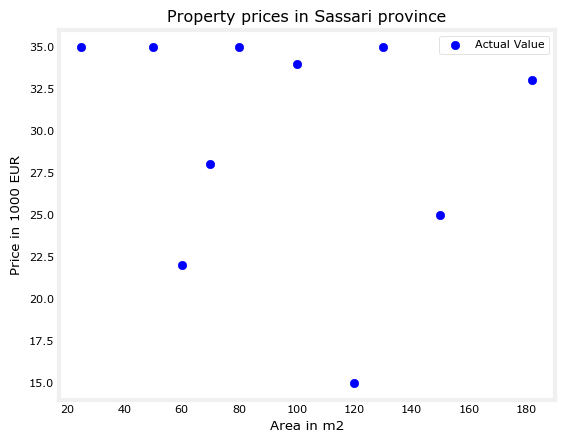

In [218]:
def plot_areas_to_prices(x_training_examples, y_training_examples, f_wb = None, ax = None):
    if not ax: 
        fig, ax = plot.subplots(1, 1)

    ax.scatter(x_training_examples, y_training_examples,
               marker="o", c="b", label="Actual Value")
    ax.set_title("Property prices in Sassari province")
    ax.set_xlabel("Area in m2")
    ax.set_ylabel("Price in 1000 EUR")

    if f_wb is not None:
        ax.plot(x_training_examples, f_wb, c="r", label="Our prediction")
    ax.legend()


plot_areas_to_prices(x_training_examples, y_training_examples)


In [219]:
def draw_cost_lines(x, y, w, b, ax):
    color = "b"
    cstr = "cost = (1/m)*("
    ctot = 0
    label = 'cost for point'
    addedbreak = False

    for p in zip(x, y):
        f_wb_p = w*p[0]+b
        c_p = ((f_wb_p - p[1])**2)/2
        c_p_txt = c_p
        ax.vlines(p[0], p[1], f_wb_p, lw=3,
                  color=color, ls='dotted', label=label)
        label = ''  # just one
        cxy = [p[0], p[1] + (f_wb_p-p[1])/2]
        ax.annotate(f'{c_p_txt:0.0f}', xy=cxy, xycoords='data', color=color,
                    xytext=(5, 0), textcoords='offset points')
        cstr += f"{c_p_txt:0.0f} +"
        if len(cstr) > 38 and addedbreak is False:
            cstr += "\n"
            addedbreak = True
        ctot += c_p
    ctot = ctot/(len(x))
    cstr = cstr[:-1] + f") = {ctot:0.0f}"
    ax.text(0.15, 0.02, cstr, transform=ax.transAxes, color=color)


In [223]:

def plot_dynamically(x_training_examples, y_training_examples): 
    w_range = numpy.array([200-200, 200+200])
    w_values = numpy.arange(*w_range, 5)
    b = 0

    costs = []
    for w_value in w_values: 
        cost = compute_cost(x_training_examples, y_training_examples, w_value, b)

        costs.append(cost)



    @interact(w = (*w_range, 10), continuous_update=False)
    def zeros_like(w=150):
        f_wb = numpy.dot(x_training_examples, w) + b

        fig, ax = plot.subplots(1, 2, constrained_layout=True, figsize=(8, 4))
        fig.canvas.toolbar_position = 'bottom'

        draw_cost_lines(x_training_examples, y_training_examples, w, b, ax[0])
        plot_areas_to_prices(x_training_examples,
                             y_training_examples, f_wb=f_wb, ax=ax[0])

        ax[1].plot(w_values, costs)

        cur_cost = compute_cost(x_training_examples,
                                y_training_examples, w, b)
        ax[1].scatter(w, cur_cost, s=100, color="r",
                      zorder=10, label=f"cost at w={w}")
        ax[1].hlines(cur_cost, ax[1].get_xlim()[0], w,
                     lw=4, color="b", ls='dotted')
        ax[1].vlines(w, ax[1].get_ylim()[0], cur_cost,
                     lw=4, color="b", ls='dotted')
        ax[1].set_title("Cost vs. w, (b fixed at 100)")
        ax[1].set_ylabel('Cost')
        ax[1].set_xlabel('w')
        ax[1].legend(loc='upper center')
        fig.suptitle(
            f"Minimize Cost: Current Cost = {cur_cost:0.0f}", fontsize=12)
        plot.show()


plot_dynamically(x_training_examples, y_training_examples)


# def f(x):
#     return x

# interact(f, x=10)


interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…